See equation 5.50 from Cosmology by Baumann. 
\begin{equation}
\ddot{\delta_k} + 2 H \dot {\delta_k} - 4 \pi G \bar{\rho_m}(t) \delta_{k} = 0
\end{equation}

- What is the range of $k$ values for which power spectrum should be obtained?
- What should the value of $\bar{\rho_{m}}$ be?
- What are the initial conditions for which numerical time evolution of $\delta_k$ is obtained?
- For every $k$ value, solve the above ODE (using RK method?) and see how $\delta_{k}$ changes with time. 
- Obtain the power spectra for each $k$ value at the last time step and plot $P(k)$ vs $k$. 

In [1]:
output_path = '/home/isha/Desktop/AU/Work_Done/Wave_Dark_Matter/Obtaining_Power_Spectrum/CDM/' 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

In [3]:
k_pow = np.arange(-4,4)   #Mpc^-1
k_val = 10.0 ** k_pow

length_scale = 2 * np.pi / k_val    #Mpc
k_val, length_scale

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 array([6.28318531e+04, 6.28318531e+03, 6.28318531e+02, 6.28318531e+01,
        6.28318531e+00, 6.28318531e-01, 6.28318531e-02, 6.28318531e-03]))

In [4]:
#Constants taken to be = 1 for testing
G = 1
hbar = 1
m = 1

**For matter dominant era only**

In [5]:
def scale_factor_a(t):
    return (t**(2/3))

def Hubble_val(t):
    return (2/(3*t))

def rho_matter(t):
    return (1/(6 * np.pi * G * t**2))

#Note that 4 pi G rho_m = 2/(3 t^2) in matter dominated era



Thus the above 2nd order ODE is simplified as

\begin{equation}
\ddot{\delta_k} + \frac{4}{3t} \dot {\delta_k} - \frac{2}{3t^{2}} \delta_{k} = 0
\end{equation}

This can be converted into 1st order as

\begin{equation}
y_{1} = \delta
\end{equation}

\begin{equation}
y_{2} = \dot y_{1} = \dot {\delta}
\end{equation}

The simplified equation then becomes
\begin{equation}
\dot y_{2} + \frac{4}{3t} y_{2} - \frac{2}{3t^{2}} y_{1} = 0
\end{equation}



### Initial Conditions

In [6]:
#Initial conditions for delta_k proportional to a and delta_k_dot propertioonal to 2a/3t
#Also see equation 5.54 in Baumann Cosmology textbook
t_i =  1e-2
t_f = 1e6
t_span = [t_i, t_f]
t_eval = np.logspace(np.log10(t_i), np.log10(t_f), 500)

delta0 = 1e-5 #Arbitrary choice
delta0_dot = 0     #Dont use the analytic expression: 2**delta_k / (3*t_i) 
#Assume initial growth rate is zero

initial_conditions = [delta0, delta0_dot]
initial_conditions

[1e-05, 0]

### For 1 value of k

In [7]:
#For 1 value of k
k_sel = k_val[0]   #Mpc^-1
k_sel


def ode_cdm(t, y):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    #H = 2 / (3 * t)
    quantum_term = 0
    grav_term = 4 * np.pi * G * rho_matter(t)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_cdm = -2*Hubble_val(t)*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt_cdm]


sol_cdm = solve_ivp(
        ode_cdm,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        #method = 'LSODA'
    )

cdm_df = pd.DataFrame({
    't': sol_cdm.t,
    'delta_cdm': sol_cdm.y[0],
    'delta_dot_cdm': sol_cdm.y[1],
    'scale_factor_a': scale_factor_a(sol_cdm.t)
})
cdm_df

,t,delta_cdm,delta_dot_cdm,scale_factor_a
0,0.010000,0.000010,0.000000e+00,0.046416
1,0.010376,0.000010,2.357711e-05,0.047572
2,0.010766,0.000010,4.518738e-05,0.048758
3,0.011171,0.000010,6.497338e-05,0.049972
4,0.011591,0.000010,8.307164e-05,0.051218
...,...,...,...,...
495,862723.729246,1.171128,9.050010e-07,9062.496023
496,895166.472138,1.200300,8.939458e-07,9288.292250
497,928829.225017,1.230201,8.830160e-07,9519.714293
498,963757.866384,1.260851,8.722136e-07,9756.902323


fig,ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].scatter(cdm_df['t'], cdm_df['delta_cdm'], label='CDM')
ax[1].scatter(cdm_df['scale_factor_a'], cdm_df['delta_cdm'], label='CDM')

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Scale Factor a')

ax[0].set_ylabel('Density Contrast $\delta_{k}$')
ax[1].set_ylabel('Density Contrast $\delta_{k}$')
for i in ax:
    i.legend()
    i.grid()

fig,ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].scatter(cdm_df['t'], cdm_df['delta_dot_cdm'], label='CDM')
ax[1].scatter(cdm_df['scale_factor_a'], cdm_df['delta_dot_cdm'], label='CDM')

ax[0].set_xlabel('log Time')
ax[1].set_xlabel('log Scale Factor a')

for i in ax:
    i.set_xscale('log')
    i.set_yscale('log')
    i.set_ylabel('log Rate of growth $\dot \delta_{k}$')
    i.legend()
    i.grid()

### Plots for 1 k value

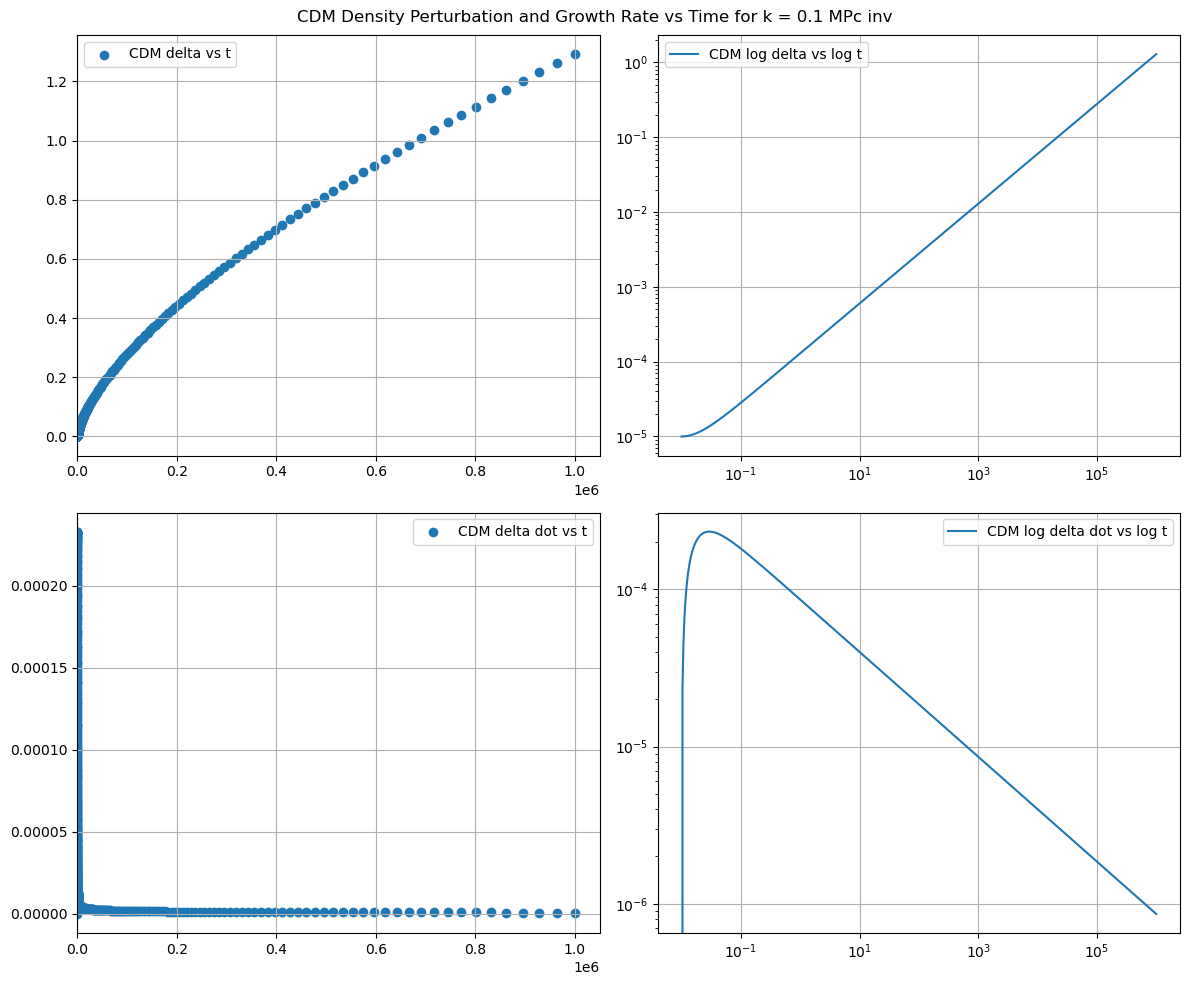

In [8]:
#Time plots

fig,ax = plt.subplots(2,2, figsize=(12, 10)) 
ax[0][0].scatter(cdm_df['t'], cdm_df['delta_cdm'], label='CDM delta vs t')
ax[0][1].loglog(cdm_df['t'], cdm_df['delta_cdm'], label='CDM log delta vs log t')

ax[1][0].scatter(cdm_df['t'], cdm_df['delta_dot_cdm'], label='CDM delta dot vs t')
ax[1][1].loglog(cdm_df['t'], cdm_df['delta_dot_cdm'], label='CDM log delta dot vs log t')

ax[0][0].set_xlim(1e-5,)
ax[1][0].set_xlim(0,)
for a in ax.flat:
    a.legend()
    a.grid()
    

plt.suptitle(f'CDM Density Perturbation and Growth Rate vs Time for k = 0.1 MPc inv')
plt.tight_layout()
plt.savefig(output_path + 'test_CDM_delta_and_dot_vs_time_and_a_0p1Mpc-inv.png', dpi=300)


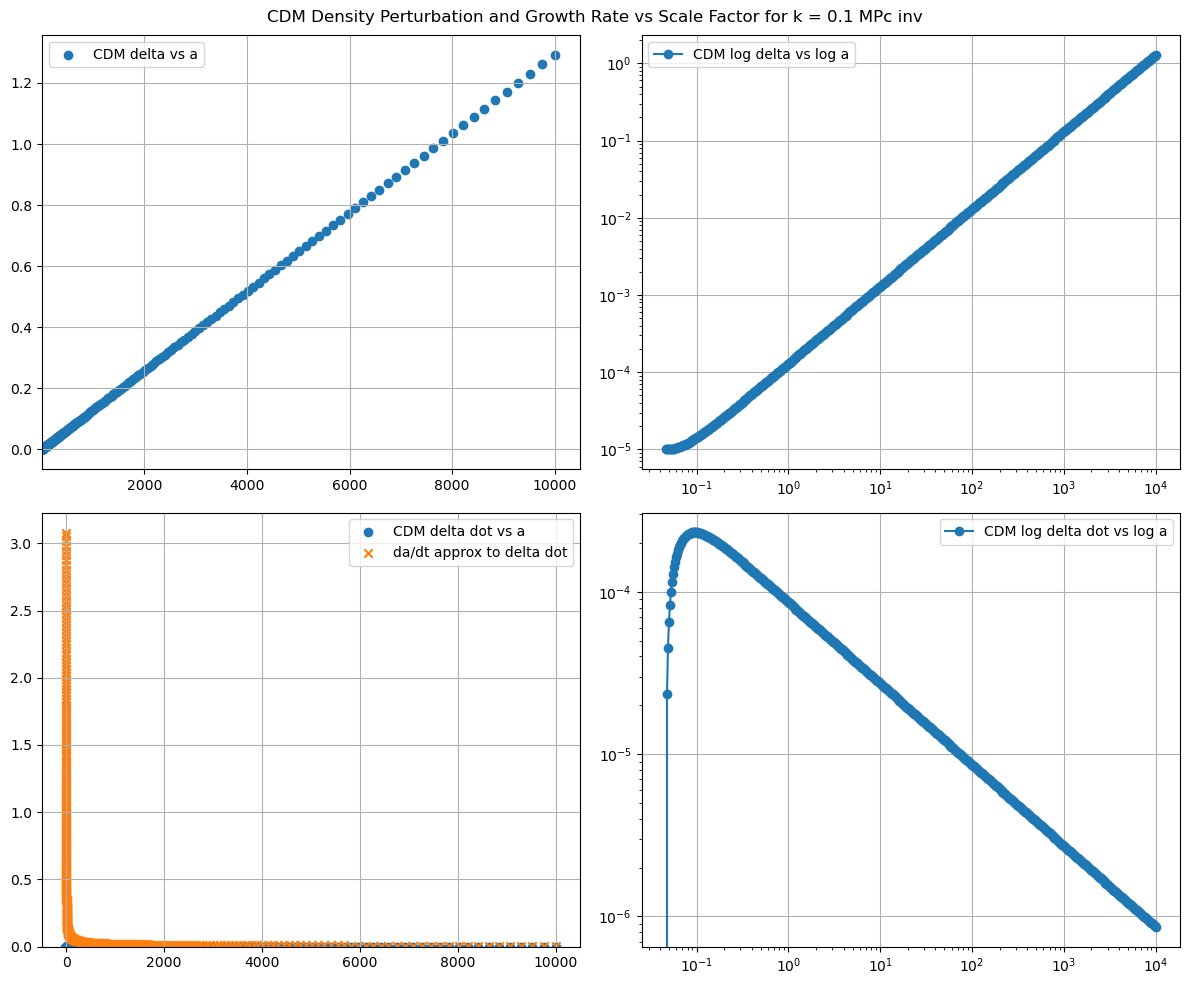

In [9]:
#Scale factor plots

fig,ax = plt.subplots(2,2, figsize=(12, 10)) 
ax[0][0].scatter(cdm_df['scale_factor_a'], cdm_df['delta_cdm'], label='CDM delta vs a')
ax[0][1].loglog(cdm_df['scale_factor_a'], cdm_df['delta_cdm'], label='CDM log delta vs log a', marker='o')

ax[1][0].scatter(cdm_df['scale_factor_a'], cdm_df['delta_dot_cdm'], label='CDM delta dot vs a')
ax[1][0].scatter(cdm_df['scale_factor_a'], np.gradient(cdm_df['scale_factor_a'], cdm_df['t']), label='da/dt approx to delta dot', marker='x')
ax[1][1].loglog(cdm_df['scale_factor_a'], cdm_df['delta_dot_cdm'], label='CDM log delta dot vs log a', marker='o')

ax[0][0].set_xlim(1e-5,)
ax[1][0].set_ylim(0,)
#ax[1][1].set_ylim(-1,)

for a in ax.flat:
    a.legend()
    a.grid()
    

plt.suptitle(f'CDM Density Perturbation and Growth Rate vs Scale Factor for k = 0.1 MPc inv')
plt.tight_layout()
plt.savefig(output_path + 'test_CDM_delta_and_dot_vs_scale-factor_and_a_0p1Mpc-inv.png', dpi=300)


### Test code for 1 k value


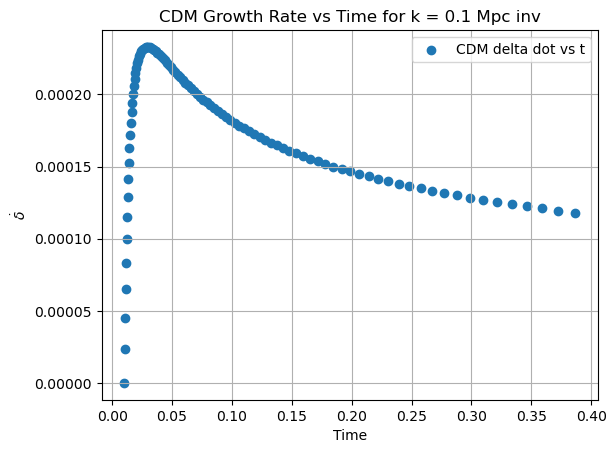

In [10]:
plt.scatter(cdm_df['t'][:100], cdm_df['delta_dot_cdm'][:100], label='CDM delta dot vs t')
#plt.scatter(cdm_df['t'][:100], 0.66/(cdm_df['t'][:100]), label='Analytic approx 2/3t', marker='x')
#plt.scatter (cdm_df['t'][:100], np.gradient(cdm_df['scale_factor_a'][:100], cdm_df['t'][:100]), label='Analytic approx da/dt = delta dot', marker='^')
plt.xlabel('Time')
plt.ylabel('$\dot{\\delta}$')
plt.title('CDM Growth Rate vs Time for k = 0.1 Mpc inv')
plt.grid()
plt.legend()
plt.savefig(output_path + 'test_CDM_delta_dot_vs_time_0p1Mpc-inv.png', dpi=300)

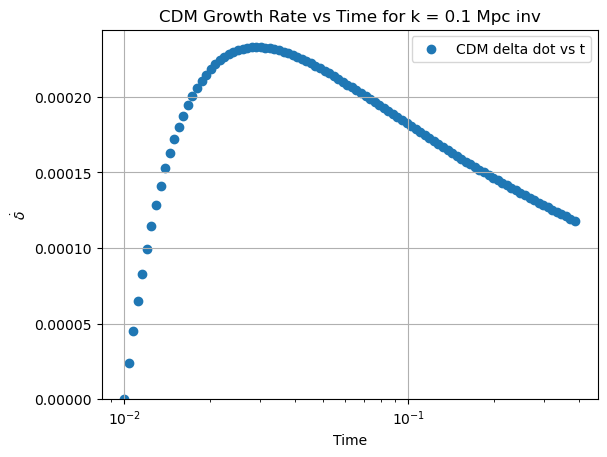

In [11]:
plt.scatter(cdm_df['t'][:100], cdm_df['delta_dot_cdm'][:100], label='CDM delta dot vs t')
#plt.scatter(cdm_df['t'][:100], 0.66/(cdm_df['t'][:100]), label='Analytic approx 2/3t', marker='x')
#plt.scatter (cdm_df['t'][:100], np.gradient(cdm_df['scale_factor_a'][:100], cdm_df['t'][:100]), label='Analytic approx da/dt = delta dot', marker='^')
plt.xlabel('Time')
plt.ylabel('$\dot{\\delta}$')

plt.xscale('log')
#plt.yscale('log')
plt.ylim(0,)
plt.title('CDM Growth Rate vs Time for k = 0.1 Mpc inv')
plt.grid()
plt.legend()
#plt.savefig(output_path + 'test_CDM_delta_dot_vs_time_0p1Mpc-inv.png', dpi=300)

np.gradient(np.log(cdm_df['delta_cdm']), np.log(cdm_df['t']))[-1]


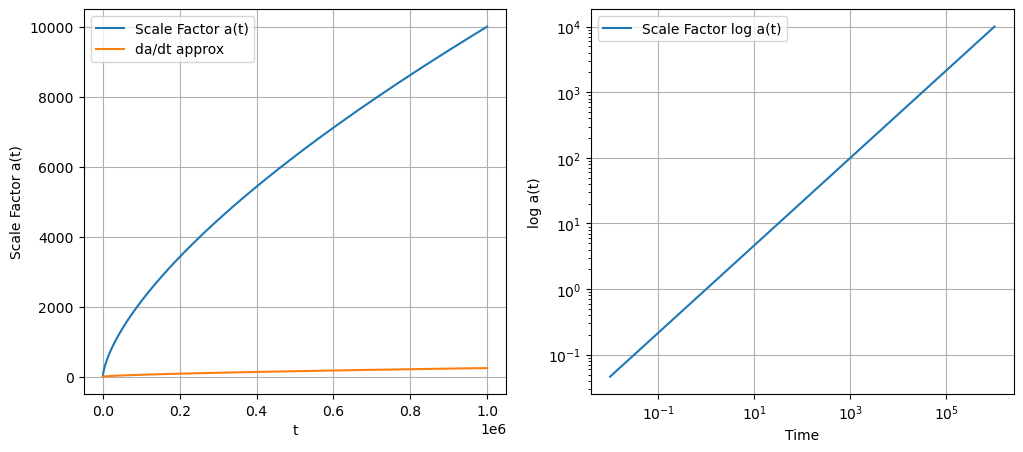

In [12]:
fig, ax  = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(t_eval, scale_factor_a(t_eval), label='Scale Factor a(t)')
ax[0].plot(t_eval, np.gradient(scale_factor_a(t_eval)), label='da/dt approx')
ax[1].loglog(t_eval, scale_factor_a(t_eval), label='Scale Factor log a(t)')
ax[0].set_xlabel('t')
ax[0].set_ylabel('Scale Factor a(t)')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('log a(t)')

for i in ax:
    #i.set_ylabel('Density Contrast δ_k')
    i.legend()
    i.grid()

### For multiple k values

In [13]:
#Here we have a second order differential equation in time for each k mode. 
#We can convert this into two first order differential equations as follows:

def ode_cdm_allkvals(t, y, k):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    #H = 2 / (3 * t)
    quantum_term = 0
    grav_term = 4 * np.pi * G * rho_matter(t)
    

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_cdm = -2*Hubble_val(t)*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt_cdm]

In [14]:
cdm_allkvals = []
for k_i in k_val:
    sol_cdm = solve_ivp(
        ode_cdm_allkvals,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        args=(k_i,),
        #method = 'LSODA'
    )

    for j in range(len(t_eval)):
        cdm_allkvals.append(
            {
                't': t_eval[j],
                'k': k_i,
                'delta_cdm': sol_cdm.y[0][j],
                'delta_dot_cdm': sol_cdm.y[1][j], 
                'scale_factor_a': scale_factor_a(t_eval[j])
            }
        )


In [15]:

df_cdm_allkvals = pd.DataFrame(cdm_allkvals)
df_cdm_allkvals.to_csv(output_path + 'cdm_density_growth_allkvals.csv', index=False)

In [16]:
df_cdm_allkvals

,t,k,delta_cdm,delta_dot_cdm,scale_factor_a
0,0.010000,0.0001,0.000010,0.000000e+00,0.046416
1,0.010376,0.0001,0.000010,2.357711e-05,0.047572
2,0.010766,0.0001,0.000010,4.518738e-05,0.048758
3,0.011171,0.0001,0.000010,6.497338e-05,0.049972
4,0.011591,0.0001,0.000010,8.307164e-05,0.051218
...,...,...,...,...,...
3995,862723.729246,1000.0000,1.171128,9.050010e-07,9062.496023
3996,895166.472138,1000.0000,1.200300,8.939458e-07,9288.292250
3997,928829.225017,1000.0000,1.230201,8.830160e-07,9519.714293
3998,963757.866384,1000.0000,1.260851,8.722136e-07,9756.902323


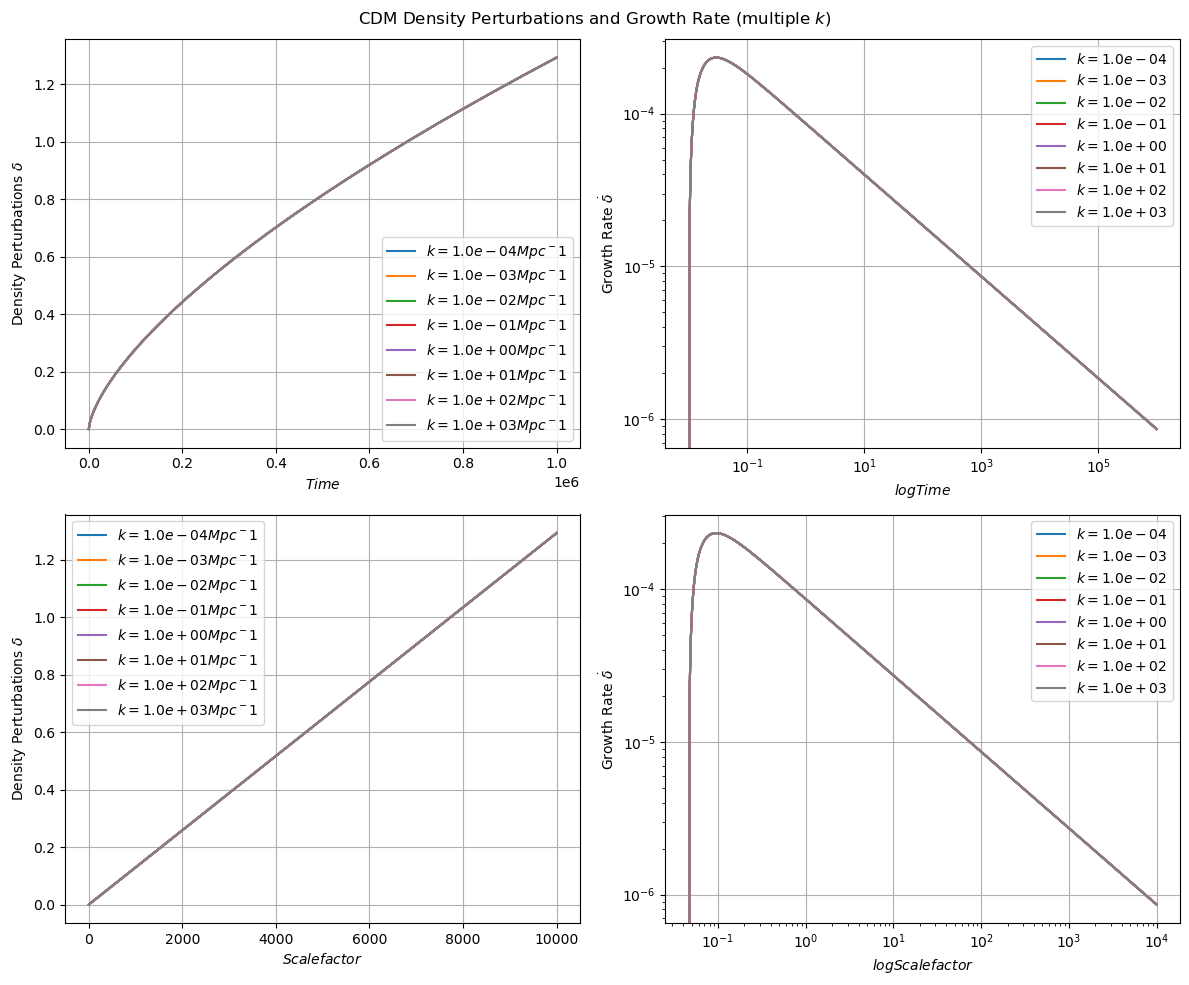

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for k_i in sorted(df_cdm_allkvals['k'].unique()):
    df_k = df_cdm_allkvals[df_cdm_allkvals['k'] == k_i]

    ax[0][0].plot(
        df_k['t'],
        df_k['delta_cdm'],
        label=fr"$k={k_i:.1e} Mpc^{-1}$"
    )

    ax[0][1].loglog(
        df_k['t'],
        df_k['delta_dot_cdm'],
        label=fr"$k={k_i:.1e}$"
    )

    ax[1][0].plot(
        df_k['scale_factor_a'],
        df_k['delta_cdm'],
        label=fr"$k={k_i:.1e} Mpc^{-1}$"
    )

    ax[1][1].loglog(
        df_k['scale_factor_a'],
        df_k['delta_dot_cdm'],
        label=fr"$k={k_i:.1e}$"
    )


ax[0][0].set_xlabel("$Time$")
ax[0][1].set_xlabel("$log Time$")
ax[1][0].set_xlabel("$Scale factor$")
ax[1][1].set_xlabel("$log Scale factor$")



ax[0][0].set_ylabel(r"Density Perturbations $\delta$")
ax[0][1].set_ylabel(r"Growth Rate $\dot{\delta}$")

ax[1][0].set_ylabel(r"Density Perturbations $\delta$")
ax[1][1].set_ylabel(r"Growth Rate $\dot{\delta}$")
 

for i in ax: 
    for j in i:
        j.legend()
        j.grid()
       
    
plt.suptitle("CDM Density Perturbations and Growth Rate (multiple $k$)")
plt.tight_layout()
plt.savefig(output_path + "cdm_density_growth_allk.png", dpi=300)
plt.show()


In [18]:
#Initial power spectrum
As = 2e-9 #From arXiv:2407.04198v2 which referneces Planck 2018 results
ns = 0.96
P_prim = As * k_val ** (ns-4)     #From Baumann Cosmology textbook equation 5.82 for k>k_eq
P_prim

array([2.89087954e+03, 2.63651348e+00, 2.40452887e-03, 2.19295639e-06,
       2.00000000e-09, 1.82402168e-12, 1.66352754e-15, 1.51715515e-18])

In [19]:
delta_ini = P_prim ** 0.5
delta_ini
delta_dot_ini = 0 * P_prim

ic = [delta_ini, delta_dot_ini]
ic

[array([5.37669001e+01, 1.62373442e+00, 4.90359956e-02, 1.48086339e-03,
        4.47213595e-05, 1.35056347e-06, 4.07863647e-08, 1.23172852e-09]),
 array([0., 0., 0., 0., 0., 0., 0., 0.])]

In [ ]:
cdm_allkvals1 = []

for k_i in k_val:

    #Scalar primordial PS for this k
    P_prim_i = As * k_i ** (ns - 4)

    delta_ini = np.sqrt(P_prim_i)
    delta_dot_ini = 0.0

    ic = [delta_ini, delta_dot_ini]  #Should be 1D vector of length 2

    sol_cdm = solve_ivp(
        ode_cdm_allkvals,
        t_span,
        ic,
        t_eval=t_eval,
        args=(k_i,),
        # method='LSODA'
    )

    for j in range(len(t_eval)):
        cdm_allkvals1.append({
            't': t_eval[j],
            'k': k_i,
            'delta_cdm': sol_cdm.y[0, j],
            'delta_dot_cdm': sol_cdm.y[1, j],
            'scale_factor_a': scale_factor_a(t_eval[j])
        })


In [21]:
df = pd.DataFrame(cdm_allkvals1)
df

,t,k,delta_cdm,delta_dot_cdm,scale_factor_a
0,0.010000,0.0001,53.766900,0.000000e+00,0.046416
1,0.010376,0.0001,53.791221,1.267656e+02,0.047572
2,0.010766,0.0001,53.863715,2.430144e+02,0.048758
3,0.011171,0.0001,53.984016,3.494345e+02,0.049972
4,0.011591,0.0001,54.151732,4.466993e+02,0.051218
...,...,...,...,...,...
3995,862723.729246,1000.0000,0.000141,1.092556e-10,9062.496023
3996,895166.472138,1000.0000,0.000145,1.079246e-10,9288.292250
3997,928829.225017,1000.0000,0.000148,1.066069e-10,9519.714293
3998,963757.866384,1000.0000,0.000152,1.053029e-10,9756.902323


In [22]:
df["P_k"] = df["delta_cdm"]**2
df["Delta2_k"] = (df["k"]**3 / (2 * np.pi**2)) * df["P_k"]

In [23]:
t_plot = df["t"].max()   #final time
df_t = df[df["t"] == t_plot]
df_t

,t,k,delta_cdm,delta_dot_cdm,scale_factor_a,P_k,Delta2_k
499,1000000.0,0.0001,6.949246e+06,4.632982e+00,10000.0,4.829201e+13,2.446502
999,1000000.0,0.0010,2.098542e+05,1.399065e-01,10000.0,4.403877e+10,2.231030
1499,1000000.0,0.0100,6.337797e+03,4.225321e-03,10000.0,4.016767e+07,2.034918
1999,1000000.0,0.1000,1.913927e+02,1.276003e-04,10000.0,3.663118e+04,1.855757
2499,1000000.0,1.0000,5.779856e+00,3.853376e-06,10000.0,3.340673e+01,1.692405
2999,1000000.0,10.0000,1.745169e-01,1.163494e-07,10000.0,3.045616e-02,1.542927
3499,1000000.0,100.0000,5.255849e-03,3.504036e-09,10000.0,2.762395e-05,1.399445
3999,1000000.0,1000.0000,1.559868e-04,1.040141e-10,10000.0,2.433187e-08,1.232667


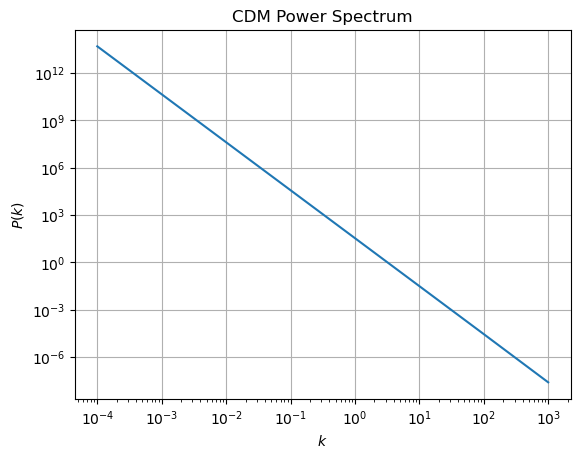

In [28]:
plt.loglog(df_t["k"], df_t["P_k"])
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.title("CDM Power Spectrum")
plt.grid(True)
plt.show()

#plt.savefig(output_path + 'cdm_power_spectrum.png', dpi=300)
plt.show()

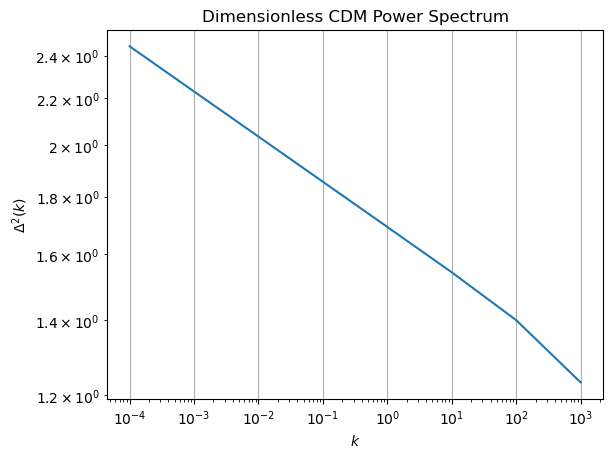

In [32]:

plt.loglog(df_t["k"], df_t["Delta2_k"])
plt.xlabel(r"$k$")
plt.ylabel(r"$\Delta^2(k)$")
plt.title("Dimensionless CDM Power Spectrum")
plt.grid(True)
plt.show()


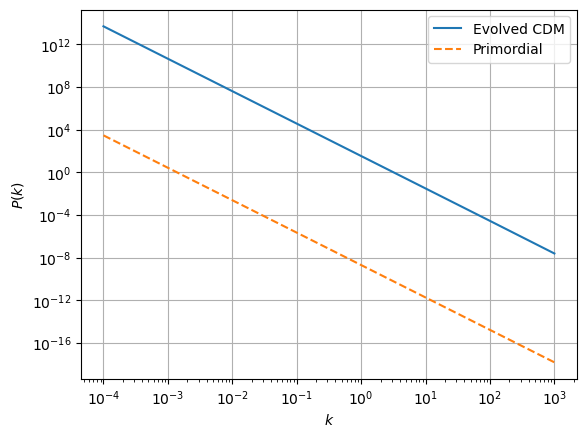

In [33]:
P_prim = As * df_t["k"]**(ns - 4)


plt.loglog(df_t["k"], df_t["P_k"], label="Evolved CDM")
plt.loglog(df_t["k"], P_prim, "--", label="Primordial")
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.legend()
plt.grid(True)

plt.show()
